In [15]:
from pandas import DataFrame
from sklearn.preprocessing import LabelEncoder

import pandas as pd

df = pd.read_csv("dataset/drug200.csv")
clean_df = df.dropna(axis=0)
print(df.head())

le = LabelEncoder()

for col in clean_df.columns:
    if clean_df[col].dtype == 'object':
        clean_df[col] = le.fit_transform(clean_df[col])
print(clean_df.head())

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  drugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  drugY
   Age  Sex  BP  Cholesterol  Na_to_K  Drug
0   23    0   0            0   25.355     4
1   47    1   1            0   13.093     2
2   47    1   1            0   10.114     2
3   28    0   2            0    7.798     3
4   61    0   1            0   18.043     4


In [21]:
from sklearn.model_selection import train_test_split

X = clean_df.drop(columns=["Drug"])
y = clean_df["Drug"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [17]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=4)

model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

[[ 4  0  0  0  0]
 [ 0  2  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 13  0]
 [ 0  0  0  0 17]]


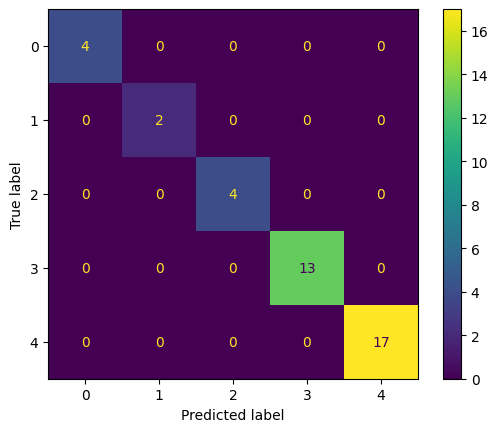

0.0


In [ ]:
from sklearn.metrics import mean_absolute_error, confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)

ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.show()

plt.figure(figsize=(16, 8))
plot_tree(model, feature_names=X.columns, class_names=[str(c) for c in set(y)], filled=True)
plt.show()

print("MAE:", mean_absolute_error(predictions, y_test))
